In [1]:
ts = 1

In [2]:
from atlas import *

etf_df, crypto_df = get_data(ts=ts)

ModuleNotFoundError: No module named 'atlas'

In [3]:
etf_df['date'] = etf_df['timestamp'].dt.date
etf_df['dt'] = etf_df.groupby('date')['timestamp'].diff().dt.seconds / 60

df = etf_df[etf_df['dt'] == ts]

df.loc[:,'di'] = (df.groupby('date')['timestamp'].diff().dt.seconds / 60).fillna(1) - 1
df.loc[:,'cont_block'] = df.groupby('date')['di'].cumsum()

df = df
df

/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_7606/3682281821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'di'] = (df.groupby('date')['timestamp'].diff().dt.seconds / 60).fillna(1) - 1
/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_7606/3682281821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'cont_block'] = df.groupby('date')['di'].cumsum()


,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,date,dt,di,cont_block
3,IBIT,2024-01-11 09:09:00+00:00,26.7900,26.7900,26.7900,26.7900,170.0,4.0,26.790000,2024-01-11,1.0,0.0,0.0
5,IBIT,2024-01-11 09:13:00+00:00,26.7500,26.7500,26.7500,26.7500,186.0,1.0,26.750000,2024-01-11,1.0,3.0,3.0
6,IBIT,2024-01-11 09:14:00+00:00,26.7600,26.7600,26.7500,26.7500,5440.0,7.0,26.751838,2024-01-11,1.0,0.0,3.0
7,IBIT,2024-01-11 09:15:00+00:00,26.7500,26.7500,26.7500,26.7500,110.0,2.0,26.750000,2024-01-11,1.0,0.0,3.0
8,IBIT,2024-01-11 09:16:00+00:00,26.7400,26.7400,26.7400,26.7400,2050.0,3.0,26.740000,2024-01-11,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188337,IBIT,2024-12-30 23:49:00+00:00,52.5602,52.5602,52.5600,52.5600,761.0,11.0,52.560122,2024-12-30,1.0,0.0,130.0
188338,IBIT,2024-12-30 23:50:00+00:00,52.5803,52.6299,52.5803,52.6299,1018.0,8.0,52.605100,2024-12-30,1.0,0.0,130.0
188341,IBIT,2024-12-30 23:55:00+00:00,52.6300,52.6788,52.6300,52.6600,1095.0,16.0,52.645186,2024-12-30,1.0,4.0,134.0
188343,IBIT,2024-12-30 23:58:00+00:00,52.6800,52.6800,52.6400,52.6400,1580.0,10.0,52.666653,2024-12-30,1.0,2.0,136.0


In [4]:
import numpy as np
df[['log_open', 'log_high', 'log_low', 'log_close', 'log_vwap']] = df[['open', 'high', 'low', 'close', 'vwap']].map(np.log)

df['sigmasq'] = (df['log_high'] - df['log_low']).map(np.square)
df['log_return_CO'] = df['log_close'] - df['log_open']

# df['log_return_vwap'] = df.groupby(['date', 'cont_block'])['log_vwap'].diff()
# df['log_return_CC'] = df.groupby(['date', 'cont_block'])['log_close'].diff()
# df['log_return_CC'] = df.groupby(['date', 'cont_block'])['log_return_CC'].shift(-1)

df['log_return_vwap'] = df.groupby(['date'])['log_vwap'].diff()
df['log_return_CC'] = df.groupby(['date'])['log_close'].diff()
df['log_return_CC'] = df.groupby(['date'])['log_return_CC'].shift(-1)
df

df['uP'] = (df['high'] - df['close'])
df['dP'] = (df['low'] - df['close'])
df['log_volume'] = df['volume'].map(np.log)

data = df.dropna()
data

/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_7606/3063716323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['log_open', 'log_high', 'log_low', 'log_close', 'log_vwap']] = df[['open', 'high', 'low', 'close', 'vwap']].map(np.log)
/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_7606/3063716323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['log_open', 'log_high', 'log_low', 'log_close', 'log_vwap']] = df[['open', 'high', 'low', 'close', 'vwap']].map(np.log)
/var/folde

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,date,...,log_low,log_close,log_vwap,sigmasq,log_return_CO,log_return_vwap,log_return_CC,uP,dP,log_volume
5,IBIT,2024-01-11 09:13:00+00:00,26.7500,26.7500,26.7500,26.7500,186.0,1.0,26.750000,2024-01-11,...,3.286534,3.286534,3.286534,0.000000e+00,0.000000,-0.001494,0.000000,0.0000,0.0000,5.225747
6,IBIT,2024-01-11 09:14:00+00:00,26.7600,26.7600,26.7500,26.7500,5440.0,7.0,26.751838,2024-01-11,...,3.286534,3.286534,3.286603,1.396980e-07,-0.000374,0.000069,0.000000,0.0100,0.0000,8.601534
7,IBIT,2024-01-11 09:15:00+00:00,26.7500,26.7500,26.7500,26.7500,110.0,2.0,26.750000,2024-01-11,...,3.286534,3.286534,3.286534,0.000000e+00,0.000000,-0.000069,-0.000374,0.0000,0.0000,4.700480
8,IBIT,2024-01-11 09:16:00+00:00,26.7400,26.7400,26.7400,26.7400,2050.0,3.0,26.740000,2024-01-11,...,3.286161,3.286161,3.286161,0.000000e+00,0.000000,-0.000374,0.000748,0.0000,0.0000,7.625595
9,IBIT,2024-01-11 09:17:00+00:00,26.7500,26.7600,26.7500,26.7600,250.0,3.0,26.755000,2024-01-11,...,3.286534,3.286908,3.286721,1.396980e-07,0.000374,0.000561,-0.000748,0.0000,-0.0100,5.521461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188336,IBIT,2024-12-30 23:48:00+00:00,52.5700,52.5700,52.5700,52.5700,203.0,4.0,52.570000,2024-12-30,...,3.962146,3.962146,3.962146,0.000000e+00,0.000000,0.000979,-0.000190,0.0000,0.0000,5.313206
188337,IBIT,2024-12-30 23:49:00+00:00,52.5602,52.5602,52.5600,52.5600,761.0,11.0,52.560122,2024-12-30,...,3.961955,3.961955,3.961958,1.447930e-11,-0.000004,-0.000188,0.001329,0.0002,0.0000,6.634633
188338,IBIT,2024-12-30 23:50:00+00:00,52.5803,52.6299,52.5803,52.6299,1018.0,8.0,52.605100,2024-12-30,...,3.962342,3.963284,3.962813,8.890122e-07,0.000943,0.000855,0.000572,0.0000,-0.0496,6.925595
188341,IBIT,2024-12-30 23:55:00+00:00,52.6300,52.6788,52.6300,52.6600,1095.0,16.0,52.645186,2024-12-30,...,3.963286,3.963856,3.963575,8.589549e-07,0.000570,0.000762,-0.000380,0.0188,-0.0300,6.998510


In [21]:
y_col = 'log_return_CC'
X_cols = [col for col in data.columns if ('log_return' in col) or (col in ['trade_count', 'sigmasq', 'log_volume', 'dP', 'uP'])]
X_cols.remove(y_col)
X_cols.remove('log_return_vwap')
X_cols.remove('log_return_CO')

X = data[X_cols]
y = np.where(data[y_col] > 0, 1, -1)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42, max_leaf_nodes=10)

# Perform cross-validation
# cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=50)

# print(f"Cross-validation scores: {cv_scores}")
# print(f"Mean cross-validation score: {cv_scores.mean()}")

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5418334787337022
Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.95      0.69     45244
           1       0.51      0.06      0.10     38433

    accuracy                           0.54     83677
   macro avg       0.53      0.51      0.40     83677
weighted avg       0.53      0.54      0.42     83677



In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

# Export graph visualization for every tree
for i, t in enumerate(rf_classifier.estimators_):
    plt.figure(figsize=(20,10))
    tree.plot_tree(t, filled=True)
    plt.title(f"Decision Tree {i}")
    plt.savefig(f"./img/decision_tree_{i}.png")
    plt.close()

In [22]:
X['pred'] = rf_classifier.predict(X)

/var/folders/c8/c3xvsb_56wq1czrwq0kr796c0000gn/T/ipykernel_7606/1931915389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pred'] = rf_classifier.predict(X)


<Axes: >

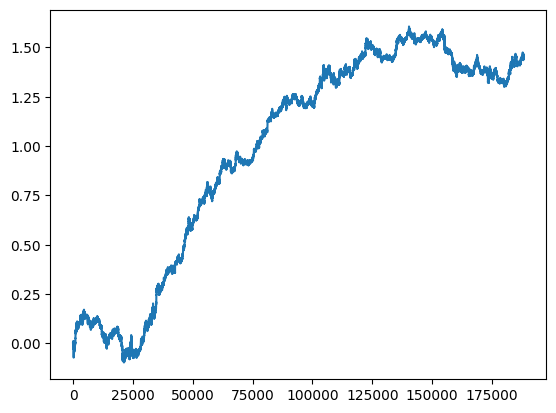

In [43]:
(X['pred'] * data[y_col])[X['pred'] == -1].cumsum().plot()